# Notebook to determine the location with the most historical snowfall in the US
work in progress

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import salem
import numpy as np
import geopandas as gpd
#from dask.distributed import Client
#import dask.dataframe as dd
import cfgrib
import datetime
from joblib import Parallel, delayed
import os
from mpl_toolkits.basemap import Basemap

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [8]:
season = '18-19'
file_pattern = '201901*.nc'
state = 'Washington'

In [7]:
day_path = '/media/scottcha/E1/Data/Temp/GFSDaily/'+ season + '/'

In [9]:
df = xr.open_dataset('/home/scottcha/Downloads/sfav2_CONUS_2019093012_to_2020092712.nc')

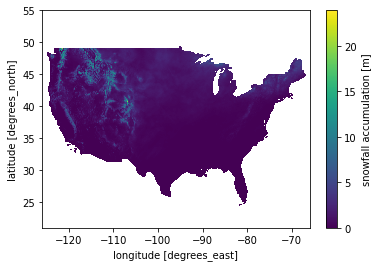

In [18]:
df.Data.plot()

In [53]:
df.where(df.Data == df.Data.max(), drop=True).squeeze()

<xarray.Dataset>
Dimensions:     (nv: 2)
Coordinates:
    lat         float64 48.78
    lon         float64 -121.8
Dimensions without coordinates: nv
Data variables:
    lat_bounds  (nv) float64 48.8 48.76
    lon_bounds  (nv) float64 -121.8 -121.8
    crs         float64 -3.277e+04
    Data        float32 23.877028
Attributes:
    format_version:  NOHRSC NetCDF raster file v1.2
    Conventions:     CF-1.6
    title:           The National Snowfall Analysis, Version 2.1, is based on...
    source:          surface observations of snowfall; Stage IV QPE; HRRR; GH...
    history:         2020-09-27 17:55:14 UTC created by module: aggregate_sno...
    comment:         2020-09-27 17:55:14 UTC created comment: aggregate_snowf...
    references:      Not applicable

In [36]:
groups = df.groupby_bins('Data', bins=100)

In [47]:
groups.max().Data.values

array([ 0.23876803,  0.47753957,  0.71630627,  0.95506108,  1.19384658,
        1.43261695,  1.67138922,  1.91012025,  2.14893126,  2.38767648,
        2.62642789,  2.86521959,  3.10398746,  3.34271455,  3.58143759,
        3.82007647,  4.05909014,  4.29784727,  4.53659248,  4.77519274,
        5.01350117,  5.25289106,  5.49166298,  5.73046541,  5.96912336,
        6.20798349,  6.44678736,  6.68535805,  6.92408085,  7.1630764 ,
        7.40148258,  7.63962126,  7.87909508,  8.11785984,  8.35534477,
        8.59542465,  8.83307934,  9.0694685 ,  9.31168556,  9.55056667,
        9.78939915, 10.02754879, 10.26608562, 10.50573063, 10.74387169,
       10.97933483, 11.22100449, 11.45898247, 11.69931698, 11.93710232,
       12.16882133, 12.4151268 , 12.63874626, 12.89223194, 13.12196255,
       13.36418152, 13.6017952 , 13.8446703 , 14.08693695, 14.317379  ,
       14.55626297, 14.77415371, 14.93235874, 15.24337006, 15.506917  ,
       15.70903683, 15.99674892, 16.19411087, 16.38476944, 16.53

In [54]:
from mpl_toolkits.basemap import Basemap

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'